In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')


Import the data set 

In [44]:
data = pd.read_csv('Cobify_clean_data.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_use,cost_trip,trip_time,avg_speed
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.4000,2.84,0.433333,64.615385
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.5040,1.02,0.500000,24.000000
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.6160,1.25,0.633333,17.684211
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.5031,1.02,0.600000,21.500000
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325,1.69,0.766667,24.130435


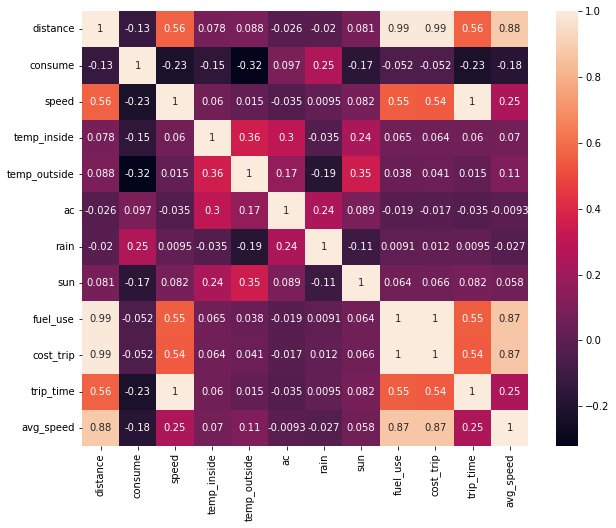

In [45]:
correlations = data.corr()
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations, annot=True)
plt.show()

In [46]:
# High multicolinearity on the created features, I drop them
cols_drop = ['cost_trip','fuel_use','avg_speed']
data=data.drop(cols_drop,axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,trip_time
0,28.0,5.0,26,21.5,12,E10,0,0,0,0.433333
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.500000
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.633333
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.600000
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.766667
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.650000
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.633333
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.750000
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.700000


Let's see which fuel's consumption can be predicted more accurately 

In [47]:
# E10
df_e10 = data[data.gas_type=='E10']
# SP98
df_98 = data[data.gas_type=='SP98']

# E10

In [48]:
# X / y split:
X = df_e10.drop('consume',axis=1)
y = df_e10['consume']

# Train/Test split: 
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [49]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

Scaling of numerical Data 

In [50]:
transformer = MinMaxScaler().fit(X_train_num)

########### TRAIN ############
X_train_norm = transformer.transform(X_train_num)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns=X_train_num.columns)
########### TEST  ############
X_test_norm = transformer.transform(X_test_num)
X_test_num_scale = pd.DataFrame(X_test_norm, index = X_test_num.index, columns=X_test_num.columns)

In [51]:
# Encode gas_type:
########### TRAIN ############
X_train_cat['gas_type']=np.where(X_train_cat['gas_type']=='E10',1,0)
########### TEST  ############
X_test_cat['gas_type']=np.where(X_test_cat['gas_type']=='E10',1,0)

In [52]:
# merge them back together: 
X_train = pd.concat([X_train_num,X_train_cat],axis = 1)
X_test  = pd.concat([X_test_num,X_test_cat],axis = 1)

Model selection:

In [53]:
# Regression models pipeline function
def models_comparison(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [54]:
models = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor()]
models_comparison(models, X_train, y_train)

LinearRegression: Train -> 0.22749931609534157, Test -> 0.012507160622945657
KNeighborsRegressor: Train -> 0.5797808136216998, Test -> 0.19446815854570565
DecisionTreeRegressor: Train -> 1.0, Test -> 0.24339872289018005


LinearRegression is the most accurate to predict consume for E10 fuel with 58% accuracy 

# SP98

In [55]:
# X / y split:
X_98 = df_98.drop('consume',axis=1)
y_98 = df_98['consume']

# Train/Test split: 
X_train_98, X_test_98, y_train_98, y_test_98 = tts(X_98, y_98, test_size=0.2)

In [56]:
X_train_num_98 = X_train_98.select_dtypes(np.number)
X_train_cat_98 = X_train_98.select_dtypes(object)
X_test_num_98 = X_test_98.select_dtypes(np.number)
X_test_cat_98 = X_test_98.select_dtypes(object)

Scaling of numerical Data

In [57]:
transformer = MinMaxScaler().fit(X_train_num_98)

########### TRAIN ############
X_train_norm_98 = transformer.transform(X_train_num_98)
X_train_num_scale_98 = pd.DataFrame(X_train_norm_98, index = X_train_num_98.index, columns=X_train_num_98.columns)
########### TEST  ############
X_test_norm_98 = transformer.transform(X_test_num_98)
X_test_num_scale_98 = pd.DataFrame(X_test_norm_98, index = X_test_num_98.index, columns=X_test_num_98.columns)

In [58]:
# Encode gas_type:
########### TRAIN ############
X_train_cat_98['gas_type']=np.where(X_train_cat_98['gas_type']=='E10',1,0)
########### TEST  ############
X_test_cat_98['gas_type']=np.where(X_test_cat_98['gas_type']=='E10',1,0)

In [59]:
# merge them back together: 
X_train_98 = pd.concat([X_train_num_98,X_train_cat_98],axis = 1)
X_test_98  = pd.concat([X_test_num_98,X_test_cat_98],axis = 1)

Model selection:

In [60]:
models_comparison(models, X_train_98, y_train_98)

LinearRegression: Train -> 0.1945597134539908, Test -> 0.11677325272400374
KNeighborsRegressor: Train -> 0.6671807843884436, Test -> 0.012110682851061205
DecisionTreeRegressor: Train -> 0.9998859317495813, Test -> 0.5457631018811484
